In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [30]:
import ld_gan
import numpy as np
import scipy.misc
import ld_gan.utils.utils as ld
from tqdm import tqdm

# split test / train

In [14]:
from shutil import copyfile

In [13]:
path = "data/faceScrub/crop/"
fnames = ld.listdir(path, file_type=".jpg", recrusive=True)

In [31]:
for fname in tqdm(fnames):
    face_id = int(fname.split("_")[-1][:-4])
    src = fname
    if face_id % 10 == 0:
        dst = fname.replace("crop", "crop_test")
        ld.mkdir(os.path.join(*dst.split("/")[:-1]))
    else:
        dst = fname.replace("crop", "crop_train")
        ld.mkdir(os.path.join(*dst.split("/")[:-1]))
    copyfile(src, dst)

100%|██████████| 69854/69854 [13:25<00:00, 86.72it/s]


In [33]:
path = "data/faceScrub/crop_test/"
X, Y = ld_gan.data_proc.data_loader.load_data(path)

100%|██████████| 530/530 [00:39<00:00, 17.39it/s]

load data from 'data/faceScrub/crop_test/'


In [34]:
len(X)

7019

In [35]:
path = "data/faceScrub/crop_train/"
X, Y = ld_gan.data_proc.data_loader.load_data(path)

100%|██████████| 530/530 [08:39<00:00,  1.10s/it]

load data from 'data/faceScrub/crop_train/'


In [36]:
len(X)

62835

In [37]:
7019. / (62835 + 7019)

0.10048100323531937

# read file

In [6]:
with open("data/faceScrub/facescrub_actresses.txt.txt", 'r') as f:
    content = f.read()

In [7]:
lines = content.split("\n")

In [52]:
def save_img(line, path = "facescrub"):
    
    # get info
    split    = line.split("\t")
    name     = split[0]
    image_id = split[1]
    face_id  = split[2]
    url      = split[3]
    bbox     = split[4]
    x1, y1, x2, y2 = bbox.split(",")
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    
    # download
    f = urllib2.urlopen(url)
    data = f.read()
    fname = "/tmp/tmp.jpg"
    with open(fname, "wb") as imgfile:
        imgfile.write(data)
    img = scipy.misc.imread(fname)
    
    # crop
    img_bb = img[y1:y2, x1:x2]
    
    # save imgs
    path_img = os.path.join(path, "imgs", name)
    path_cro = os.path.join(path, "crop", name)
    ld.mkdir(path_img)
    ld.mkdir(path_cro)
    fname_img = os.path.join(path_img, image_id + "_" + face_id + ".jpg")
    fname_cro = os.path.join(path_cro, image_id + "_" + face_id + ".jpg")
    scipy.misc.imsave(fname_img, img)
    scipy.misc.imsave(fname_cro, img_bb)

In [63]:
ld.mkdir("data/birds/facescrub")

<IPython.core.display.Javascript object>


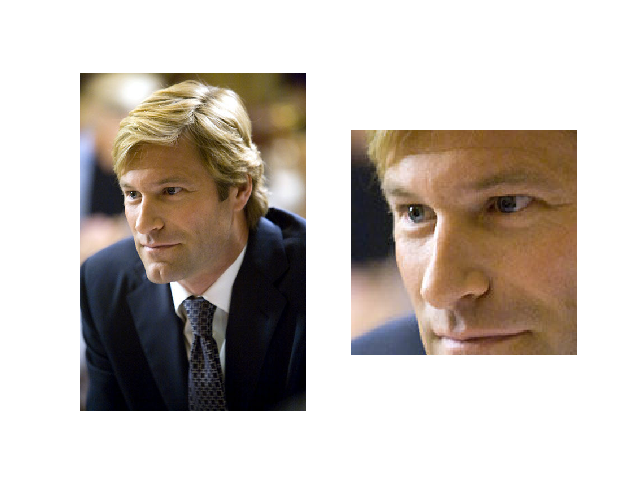

In [60]:
img, img_bb = get_img(lines[18])
ld.disp([img, img_bb])

In [45]:
line = lines[4]

In [46]:
line.split("\t")

['Aaron Eckhart',
 '4',
 '4',
 'http://25.media.tumblr.com/nJ2vga5sae9o2ks4FltK2lYvo1_400.jpg',
 '62,90,231,259',
 '658d83f35859d2f313ff660c1900427c21eae1c41e3035307428f62b645e64d7']

In [47]:
url = line.split("\t")[3]

In [49]:
import urllib2

f = urllib2.urlopen(url)

# download product and save to path
data = f.read()
fname = "/tmp/tmp.jpg"
with open(fname, "wb") as imgfile:
    imgfile.write(data)

In [50]:
img = scipy.misc.imread(fname)

<IPython.core.display.Javascript object>


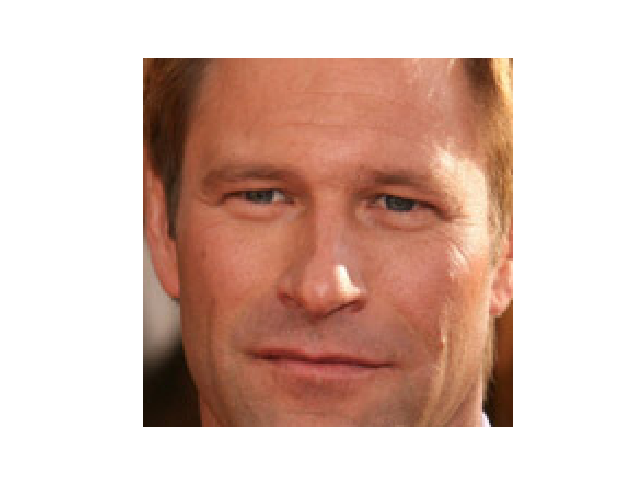

In [51]:
ld.disp([img[y1:y2, x1:x2]])